In [4]:
import pandas as pd
import matplotlib.pyplot as plt   # installer via pip
import numpy as np

from tabulate import tabulate      #pip install tabulate

In [5]:
pd.set_option('display.max_columns', 50)    # Force pandas à afficher plus de 8 colonnes
pd.set_option('display.width', 1000)        # Force à afficher plus de 80 ligne

# Définit la taille des graphiques
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 15 and height to 10
fig_size[0] = 15.0
fig_size[1] = 10.0
plt.rcParams["figure.figsize"] = fig_size


Current size: [6.0, 4.0]


In [51]:
# Lecture du fichier CSV et création du dataframe df

df = pd.read_csv("D:\BIGDATA\Datas_arbres.csv", sep=';')
print(df.columns)    # Affiche le nom des colonnes du dataframe

Index(['IDBASE', 'DOMANIALITE', 'ARRONDISSEMENT', 'LIBELLEFRANCAIS', 'HAUTEUR_m', 'geo_point_2d'], dtype='object')


In [67]:
# Affiche la quantité d'arbres dont la hauteur est inférieure à 40

df1 = df.groupby(["HAUTEUR_m"]).size().reset_index(name='NOMBRE')   # Recupère la qte par hauteur
df2 = df1[(df1["HAUTEUR_m"] < 40)]   # Filtre sur la hauteur < 40

print(tabulate(df2, headers=['idx','HAUTEUR (m)', 'Qte'], tablefmt='orgtbl'))

|   idx |   HAUTEUR (m) |   Qte |
|-------+---------------+-------|
|     0 |             0 | 34149 |
|     1 |             1 |   786 |
|     2 |             2 |  1678 |
|     3 |             3 |  3371 |
|     4 |             4 |  5423 |
|     5 |             5 | 27952 |
|     6 |             6 | 11753 |
|     7 |             7 |  8057 |
|     8 |             8 | 14784 |
|     9 |             9 |  5119 |
|    10 |            10 | 27837 |
|    11 |            11 |  3156 |
|    12 |            12 | 11654 |
|    13 |            13 |  3249 |
|    14 |            14 |  4170 |
|    15 |            15 | 17189 |
|    16 |            16 |  3517 |
|    17 |            17 |  1973 |
|    18 |            18 |  4393 |
|    19 |            19 |   502 |
|    20 |            20 |  7392 |
|    21 |            21 |   168 |
|    22 |            22 |  1186 |
|    23 |            23 |   219 |
|    24 |            24 |   232 |
|    25 |            25 |  2116 |
|    26 |            26 |   150 |
|    27 |     

In [68]:
total_arbre = df.shape[0]
nb1 = df[(df["HAUTEUR_m"] == 0)].shape[0]
nb2 = df[(df["HAUTEUR_m"] > 0) & (df["HAUTEUR_m"] <= 100)].shape[0]
nb3 = df[(df["HAUTEUR_m"] > 100)].shape[0]

# [['Alice', 24], ['Bob', 19]] <-- Exemple
result = []
result.append(["Tous",total_arbre,''])
result.append(["=0",nb1,round(nb1/total_arbre*100,2)])
result.append(["0>?<=100",nb2,round(nb2/total_arbre*100,2)])
result.append([">100",nb3,round(nb3/total_arbre*100,2)])

print(tabulate(result, headers=['Arbres', 'Qte', '%'], tablefmt='fancy_grid'))


╒══════════╤════════╤═══════╕
│ Arbres   │    Qte │ %     │
╞══════════╪════════╪═══════╡
│ Tous     │ 203530 │       │
├──────────┼────────┼───────┤
│ =0       │  34149 │ 16.78 │
├──────────┼────────┼───────┤
│ 0>?<=100 │ 169256 │ 83.16 │
├──────────┼────────┼───────┤
│ >100     │    125 │ 0.06  │
╘══════════╧════════╧═══════╛


In [69]:
# Nombre d'arbres par arrondissement en tableau texte

#print("Nombre d'arbre par ARRONDISSEMENT/NOM ARBRE")
#print(df.groupby(["ARRONDISSEMENT","LIBELLEFRANCAIS"]).size().reset_index(name='NOMBRE'))

print("Total arbres sur le territoire parisien et les cimetières extra-muros")
df1 = df.groupby(["ARRONDISSEMENT"]).size().reset_index(name='NOMBRE')

print(tabulate(df1, headers="keys", tablefmt="orgtbl"))

Total arbres sur le territoire parisien et des cimetières extra-muros
|    | ARRONDISSEMENT    |   NOMBRE |
|----+-------------------+----------|
|  0 | BOIS DE BOULOGNE  |     4085 |
|  1 | BOIS DE VINCENNES |    11805 |
|  2 | HAUTS-DE-SEINE    |     5409 |
|  3 | PARIS 10E ARRDT   |     3422 |
|  4 | PARIS 11E ARRDT   |     5810 |
|  5 | PARIS 12E ARRDT   |    12479 |
|  6 | PARIS 13E ARRDT   |    16849 |
|  7 | PARIS 14E ARRDT   |    11937 |
|  8 | PARIS 15E ARRDT   |    17219 |
|  9 | PARIS 16E ARRDT   |    16945 |
| 10 | PARIS 17E ARRDT   |    10962 |
| 11 | PARIS 18E ARRDT   |    10188 |
| 12 | PARIS 19E ARRDT   |    14282 |
| 13 | PARIS 1ER ARRDT   |     1717 |
| 14 | PARIS 20E ARRDT   |    15413 |
| 15 | PARIS 2E ARRDT    |      542 |
| 16 | PARIS 3E ARRDT    |     1225 |
| 17 | PARIS 4E ARRDT    |     2762 |
| 18 | PARIS 5E ARRDT    |     2425 |
| 19 | PARIS 6E ARRDT    |     1784 |
| 20 | PARIS 7E ARRDT    |     8763 |
| 21 | PARIS 8E ARRDT    |     7270 |
| 22 | PARIS 9E AR

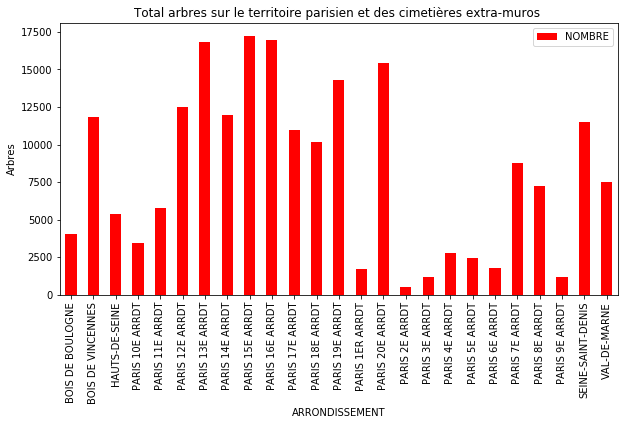

In [53]:
# Total arbres par ARRONDISSEMENT Graphique
# -----------------------------------------

# Set figure width to 10 and height to 5
fig_size[0] = 10.0
fig_size[1] = 5.0
plt.rcParams["figure.figsize"] = fig_size

df1 = df.groupby(["ARRONDISSEMENT"]).size().reset_index(name='NOMBRE')
#print(df1)
#print(df1.shape)
df1.plot(kind='bar',x='ARRONDISSEMENT',y='NOMBRE',color='red')
plt.title('Total arbres sur le territoire parisien et les cimetières extra-muros')    # Titre
plt.ylabel("Arbres")
plt.show()


    DOMANIALITE  MIN   MAX
0    Alignement  1.0  40.0
1     CIMETIERE  1.0  35.0
2           DAC  3.0  16.0
3         DASCO  1.0  34.0
4         DASES  5.0   5.0
5          DFPE  1.0  25.0
6           DJS  1.0  40.0
7        Jardin  1.0  40.0
8  PERIPHERIQUE  1.0  28.0


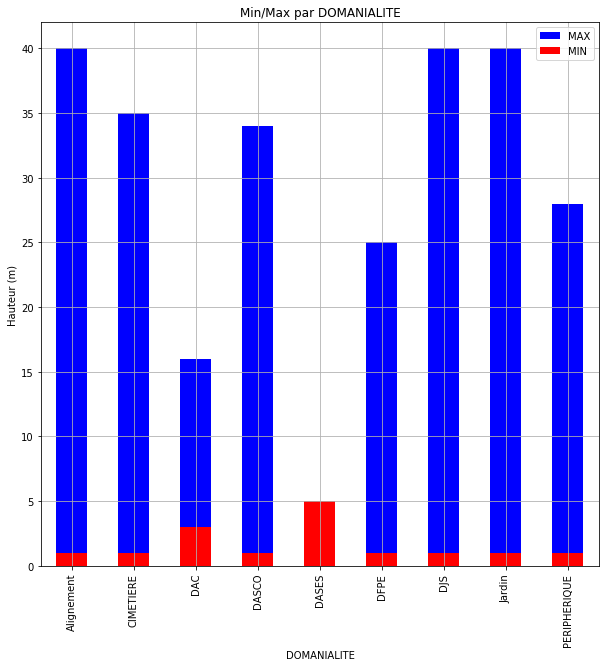

In [52]:
# Hauteur Min/Max par DOMANIALITE
# -------------------------------

# Set figure width to 15 and height to 10
fig_size[0] = 10.0
fig_size[1] = 10.0
plt.rcParams["figure.figsize"] = fig_size

df1 = df[(df["HAUTEUR_m"] >= 1) & (df["HAUTEUR_m"] <= 40)]   # Ne recupere que les arbres entre 1 m et 40 m

dfmin = df1.groupby(["DOMANIALITE"])["HAUTEUR_m"].min()   # Création d'une liste avec la taille min par Arrondissement
dfmax = df1.groupby(["DOMANIALITE"])["HAUTEUR_m"].max()   # Création d'une liste avec la taille max par Arrondissement

df2 = pd.concat([dfmin, dfmax], axis=1).reset_index()    # Création d'une dataframe avec les deux listes
df2 = df2.set_axis(['DOMANIALITE','MIN', 'MAX'], axis=1, inplace=False)  # Nommage des colonnes

print(df2)

ax = plt.gca() # gca stands for 'get current axis'
df2.plot(kind='bar',x='DOMANIALITE',y='MAX', color='blue', ax=ax)  # Création des 2 graphes
df2.plot(kind='bar',x='DOMANIALITE',y='MIN', color='red', ax=ax)

plt.title('Min/Max par DOMANIALITE')    # Titre
plt.ylabel("Hauteur (m)")
plt.grid(True)                             # Affichage d'une grille
plt.show()

     ARRONDISSEMENT  MIN   MAX
0   PARIS 10E ARRDT  1.0  30.0
1   PARIS 11E ARRDT  1.0  40.0
2   PARIS 12E ARRDT  1.0  40.0
3   PARIS 13E ARRDT  1.0  40.0
4   PARIS 14E ARRDT  1.0  32.0
5   PARIS 15E ARRDT  1.0  40.0
6   PARIS 16E ARRDT  1.0  40.0
7   PARIS 17E ARRDT  1.0  34.0
8   PARIS 18E ARRDT  1.0  34.0
9   PARIS 19E ARRDT  1.0  40.0
10  PARIS 1ER ARRDT  2.0  26.0
11  PARIS 20E ARRDT  1.0  40.0
12   PARIS 2E ARRDT  2.0  22.0
13   PARIS 3E ARRDT  1.0  30.0
14   PARIS 4E ARRDT  1.0  30.0
15   PARIS 5E ARRDT  1.0  40.0
16   PARIS 6E ARRDT  1.0  28.0
17   PARIS 7E ARRDT  1.0  30.0
18   PARIS 8E ARRDT  1.0  35.0
19   PARIS 9E ARRDT  1.0  28.0


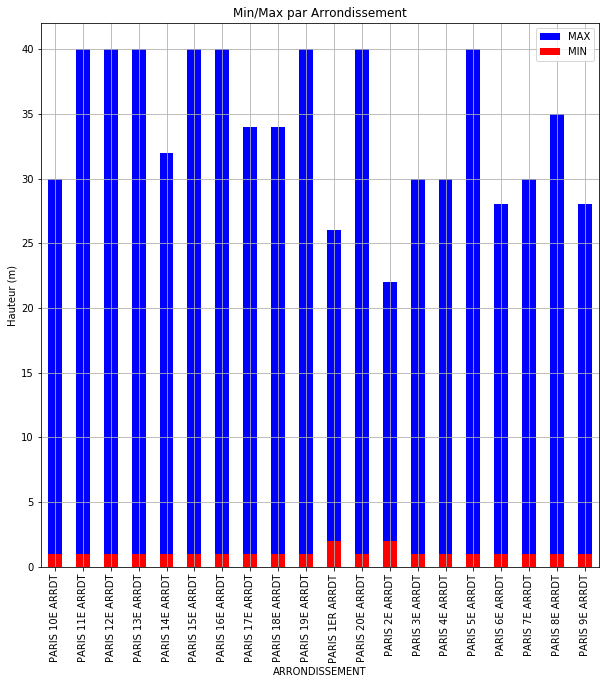

In [45]:
# Hauteur Min/Max par ARRONDISSEMENT
# ----------------------------------

# Set figure width to 15 and height to 10
fig_size[0] = 10.0
fig_size[1] = 10.0
plt.rcParams["figure.figsize"] = fig_size

df1 = df[(df["HAUTEUR_m"] >= 1) & (df["HAUTEUR_m"] <= 40)]   # Ne recupere que les arbres entre 1 m et 40 m
df1 = df1[df1['ARRONDISSEMENT'].str.contains("PARIS")]       # Ne recupere que les Arrondissement de PARIS

dfmin = df1.groupby(["ARRONDISSEMENT"])["HAUTEUR_m"].min()   # Création d'une liste avec la taille min par Arrondissement
dfmax = df1.groupby(["ARRONDISSEMENT"])["HAUTEUR_m"].max()   # Création d'une liste avec la taille max par Arrondissement

df2 = pd.concat([dfmin, dfmax], axis=1).reset_index()    # Création d'une dataframe avec les deux listes
df2 = df2.set_axis(['ARRONDISSEMENT','MIN', 'MAX'], axis=1, inplace=False)  # Nommage des colonnes

print(df2)

ax = plt.gca() # gca stands for 'get current axis'
df2.plot(kind='bar',x='ARRONDISSEMENT',y='MAX', color='blue', ax=ax)  # Création des 2 graphes
df2.plot(kind='bar',x='ARRONDISSEMENT',y='MIN', color='red', ax=ax)

plt.title('Min/Max par Arrondissement')    # Titre
plt.ylabel("Hauteur (m)")
plt.grid(True)                             # Affichage d'une grille
plt.show()


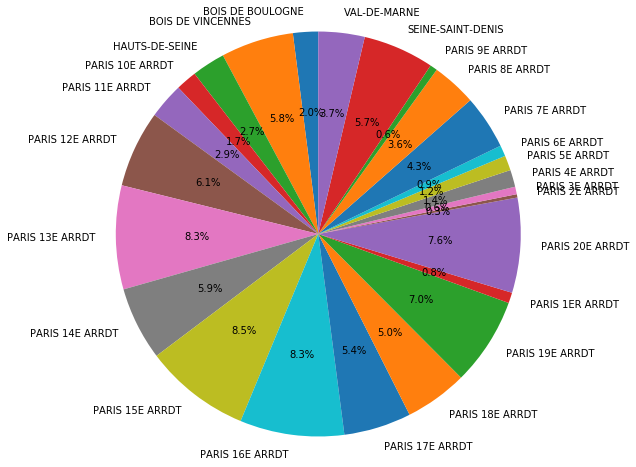

In [14]:
# Set figure width to 15 and height to 10
fig_size[0] = 8.0
fig_size[1] = 8.0
plt.rcParams["figure.figsize"] = fig_size

df1 = df.groupby(["ARRONDISSEMENT"]).size().reset_index(name='NOMBRE')

labels = df1["ARRONDISSEMENT"]
sizes = df1["NOMBRE"]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [72]:
df1 = df[(df["HAUTEUR_m"] >= 1) & (df["HAUTEUR_m"] <= 40)]
df2 = df1.groupby(["ARRONDISSEMENT","LIBELLEFRANCAIS"]).size().reset_index(name='NOMBRE')
df2 = df2.set_axis(['ARRONDISSEMENT','NOM', 'Qte'], axis=1, inplace=False)  # Nommage des colonnes

print(df2)



        ARRONDISSEMENT                               NOM   Qte
0     BOIS DE BOULOGNE                           Alisier    11
1     BOIS DE BOULOGNE                         Araucaria     1
2     BOIS DE BOULOGNE               Arbre aux mouchoirs     1
3     BOIS DE BOULOGNE           Arbre aux quarante écus     1
4     BOIS DE BOULOGNE                    Arbre de Judée     2
5     BOIS DE BOULOGNE                           Catalpa     4
6     BOIS DE BOULOGNE                 Cerisier à fleurs     6
7     BOIS DE BOULOGNE                            Charme    37
8     BOIS DE BOULOGNE                    Charme-Houblon    37
9     BOIS DE BOULOGNE                             Chêne    34
10    BOIS DE BOULOGNE                     Cyprès Chauve     2
11    BOIS DE BOULOGNE                             Cèdre     1
12    BOIS DE BOULOGNE                            Erable   465
13    BOIS DE BOULOGNE                            Fevier     6
14    BOIS DE BOULOGNE                             Frên